# USL FINAL EXAM

### Dataset Information: 
These data were aggregated from a number of sources including the American Community Survey (census.gov), clinicaltrials.gov, and cancer.gov

### ATTRIBUTES:

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county

povertyPercent: Percent of populace in poverty

studyPerCap: Per capita number of cancer-related clinical trials per county

MedianAge: Median age of county residents

MedianAgeMale: Median age of male county residents

MedianAgeFemale: Median age of female county residents

Geography: County name

AvgHouseholdSize: Mean household size of county

PercentMarried: Percent of county residents who are married

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

PctEmployed16_Over: Percent of county residents ages 16 and over employed

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

PctPrivateCoverage: Percent of county residents with private health coverage

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

PctPublicCoverage: Percent of county residents with government-provided health coverage

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White

PctBlack: Percent of county residents who identify as Black

PctAsian: Percent of county residents who identify as Asian

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian

PctMarriedHouseholds: Percent of married households

BirthRate: Number of live births relative to number of women in county

In [1]:
## Kindly change the below cells from markdown to code and execute it 

In [2]:
import pandas as pd

import csv

with open("cancer_data.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("cancer_data.csv")

df.head()


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,39.3,36.9,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

### 1.	Data Understanding (5 marks)

a.	Read the dataset (tab, csv, xls, txt, inbuilt dataset). Print the number of rows, cols and types of variables (continuous, categorical etc.)? (1 MARK)

b.	Calculate five-point summary for numerical variables (1 MARK)

c.	Summarize observations for categorical variables – no. of categories, % observations in each category.  (1 MARK)

d.	Generate the covariance and correlation tables for the data (1 MARK)

e.	Create Visualization plots to find the relationship amongst the variables. (1 MARK)


In [4]:
df.shape

(3047, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3047 non-null   int64  
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   MedianAge                3047 non-null   float64
 9   MedianAgeMale            3047 non-null   float64
 10  MedianAgeFemale          3047 non-null   float64
 11  Geography                3047 non-null   object 
 12  AvgHouseholdSize         3047 non-null   float64
 13  PercentMarried           3047 non-null   float64
 14  PctNoHS18_24            

In [6]:
df.describe()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [7]:
for i in df.select_dtypes(include=object).columns:
    print(i, 'Sub-categories:', df[i].nunique(), '\n')
    print(df[i].value_counts(normalize=True), '\n')

Geography Sub-categories: 3047 

Brevard County, Florida        0.000328
Watonwan County, Minnesota     0.000328
Baker County, Oregon           0.000328
Gaines County, Texas           0.000328
Vinton County, Ohio            0.000328
                                 ...   
McCreary County, Kentucky      0.000328
Leflore County, Mississippi    0.000328
Moniteau County, Missouri      0.000328
Leon County, Texas             0.000328
Suffolk County, New York       0.000328
Name: Geography, Length: 3047, dtype: float64 



In [8]:
df.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [9]:
df.drop('PctSomeCol18_24',axis=1, inplace=True)

In [10]:
df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].median(), 
                                inplace=True)
df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].median(),
                                    inplace=True)

In [11]:
df.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [12]:
df.cov()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,2.006065e+06,6.707688e+05,-5.641658e+03,5684.000557,4.589740e+06,4.319927e+08,-1231.768303,6.156522e+04,-1546.271742,-925.005303,...,2129.155494,2707.689711,-1927.548664,-811.269457,-3.166820e+03,645.900759,1608.493459,1042.222735,-988.857406,-97.056945
avgDeathsPerYear,6.707688e+05,2.541514e+05,-1.269149e+03,1724.343186,1.354825e+06,1.621797e+08,-216.214567,1.695163e+04,-561.823532,-391.206482,...,510.257292,762.653683,-520.595018,-84.249978,-1.545509e+03,619.946603,583.054589,381.545504,-531.054768,-74.503205
TARGET_deathRate,-5.641658e+03,-1.269149e+03,7.701464e+02,680.503765,-1.432134e+05,-1.096494e+06,76.371917,-3.275448e+02,5.500644,-3.180422,...,-81.647463,-70.108816,88.042950,76.231772,-8.064079e+01,103.671839,-13.497660,-18.537747,-53.504160,-4.816945
incidenceRate,5.684001e+03,1.724343e+03,6.805038e+02,2976.873555,-6.806871e+02,4.831766e+05,3.163334,2.233229e+03,44.713640,-4.200965,...,48.574207,77.230460,19.727621,13.612204,-1.296752e+01,89.998452,-1.156927,-40.064827,-54.573097,-12.804655
medIncome,4.589740e+06,1.354825e+06,-1.432134e+05,-680.687103,1.449638e+08,9.331187e+08,-60881.282453,2.805957e+05,-7248.065999,-5767.570700,...,76773.257234,85005.399658,-71266.701878,-52975.182049,3.297970e+04,-47289.765053,13383.417805,3542.233614,35301.784816,-243.745681
popEst2015,4.319927e+08,1.621797e+08,-1.096494e+06,483176.625884,9.331187e+08,1.082800e+11,-137713.891320,9.711096e+06,-375961.155110,-303706.684914,...,360137.868493,493217.345584,-413032.860254,-83416.682712,-1.024609e+06,349349.583528,398690.200650,279507.655124,-276799.738861,-37730.378124
povertyPercent,-1.231768e+03,-2.162146e+02,7.637192e+01,3.163334,-6.088128e+04,-1.377139e+05,41.076395,-1.889082e+02,-8.501750,-7.167750,...,-39.471376,-41.362401,32.726363,31.290005,-5.348077e+01,47.650582,-2.631360,1.061792,-25.484081,-0.156323
studyPerCap,6.156522e+04,1.695163e+04,-3.275448e+02,2233.229368,2.805957e+05,9.711096e+06,-188.908243,2.805062e+05,-624.573062,-101.434085,...,327.019916,500.692491,-213.876445,-179.727831,2.020574e+02,-152.119453,86.464326,-28.407262,-180.099368,11.228627
MedianAge,-1.546272e+03,-5.618235e+02,5.500644e+00,44.713640,-7.248066e+03,-3.759612e+05,-8.501750,-6.245731e+02,2052.495922,30.570582,...,-8.739487,-15.805358,17.429425,-0.913339,2.598005e+01,-11.308230,-4.543905,-4.825107,4.318854,-0.744582
MedianAgeMale,-9.250053e+02,-3.912065e+02,-3.180422e+00,-4.200965,-5.767571e+03,-3.037067e+05,-7.167750,-1.014341e+02,30.570582,27.311250,...,-6.965582,-10.302527,16.350104,0.079187,3.407351e+01,-18.438599,-3.251038,-4.902090,7.635159,-1.080394


In [13]:
df.corr()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.166670,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.112218,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.326195,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.098707,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.706971,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.121343,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.682822,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.068458,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.021388,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.147777,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


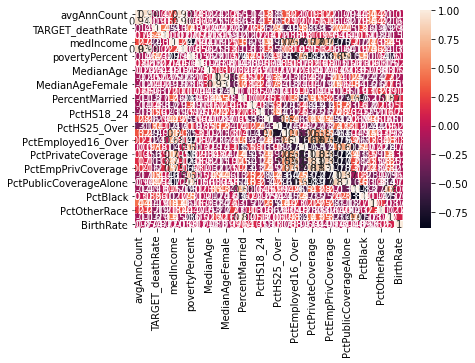

In [14]:
sns.heatmap(df.corr(), annot= True)
plt.show()

### 2.	Data Preparation (5 marks)

a.	Scale / Transform/ clean the data so that it is suitable for model building.


In [15]:
df_num = df.select_dtypes(include=np.number)
df_scaled = StandardScaler().fit_transform(df_num.
            drop('TARGET_deathRate', axis = 1))

In [16]:
df_scaled = pd.DataFrame(df_scaled, 
                         columns = df_num.drop('TARGET_deathRate', axis = 1).columns)

In [17]:
cov_mat = np.cov(df_scaled.T)
print(cov_mat[0:5])

[[ 1.0003283   0.93971619  0.07357732  0.26923304  0.92719784 -0.13573846
   0.08209832 -0.02410542 -0.12500964 -0.12288443  0.06480906 -0.10614255
  -0.14337393 -0.1821137   0.2842695  -0.31147744  0.32112594  0.19789609
  -0.00901876  0.13228779  0.16672422  0.20241535 -0.17360528 -0.09372984
  -0.13654595  0.0313859   0.43521401  0.20925245 -0.10625574 -0.03451896]
 [ 0.93971619  1.0003283   0.06271044  0.22328004  0.97795501 -0.06693991
   0.06350917 -0.0246068  -0.14853595 -0.14411651  0.08618976 -0.18108854
  -0.13683907 -0.15146754  0.25984608 -0.29602657  0.29330604  0.12492966
   0.06972351  0.056201    0.11225528  0.16017627 -0.13172974 -0.02734694
  -0.18722047  0.08463488  0.44321969  0.21521999 -0.16031874 -0.07444445]
 [ 0.07357732  0.06271044  1.0003283  -0.00103653  0.02692119  0.00904922
   0.077308    0.01809511 -0.01473807 -0.00910855 -0.11843884 -0.11956372
  -0.17081814  0.02265123  0.0468508   0.12176456 -0.0381897   0.00484759
   0.10001228  0.1052088   0.0987391

### 3.	Dimensionality Reduction (15 marks)

a.	How will you decide when to apply PCA based on the correlation? (2 marks) 

b.	Apply PCA on the above dataset and determine the number of PCA components to be used so that 90% of the variance in data is explained by the same. (7 marks)

c.	Build a data frame with the principal components and check if multi-collinearity still exists. ( 2  marks).

d.	Visualize the spread of data across PCA components. (2 marks)

e.	Check for outliers in the PCA data and treat the same. (2 marks)


#A)

We apply PCA to reduce the curse of dimensionality.

When there is large multicolinearity we go for PCA.

From the above Heatmap, we can observe that there is a huge correlation between multiple features
hence, high amount of Multicolinearity. Hence, we apply PCA.

In [18]:
#B)

from sklearn.decomposition import PCA
import numpy as np

cov_matrix=np.cov(df_scaled.T)
print("Covariance Matrix \n",cov_matrix)

Covariance Matrix 
 [[ 1.0003283   0.93971619  0.07357732  0.26923304  0.92719784 -0.13573846
   0.08209832 -0.02410542 -0.12500964 -0.12288443  0.06480906 -0.10614255
  -0.14337393 -0.1821137   0.2842695  -0.31147744  0.32112594  0.19789609
  -0.00901876  0.13228779  0.16672422  0.20241535 -0.17360528 -0.09372984
  -0.13654595  0.0313859   0.43521401  0.20925245 -0.10625574 -0.03451896]
 [ 0.93971619  1.0003283   0.06271044  0.22328004  0.97795501 -0.06693991
   0.06350917 -0.0246068  -0.14853595 -0.14411651  0.08618976 -0.18108854
  -0.13683907 -0.15146754  0.25984608 -0.29602657  0.29330604  0.12492966
   0.06972351  0.056201    0.11225528  0.16017627 -0.13172974 -0.02734694
  -0.18722047  0.08463488  0.44321969  0.21521999 -0.16031874 -0.07444445]
 [ 0.07357732  0.06271044  1.0003283  -0.00103653  0.02692119  0.00904922
   0.077308    0.01809511 -0.01473807 -0.00910855 -0.11843884 -0.11956372
  -0.17081814  0.02265123  0.0468508   0.12176456 -0.0381897   0.00484759
   0.10001228  0

In [19]:
eig_val, eig_vec = np.linalg.eig(cov_matrix)
print("Eigen Vectors \n",eig_vec)
print("\n Eigen Values \n",eig_val)

Eigen Vectors 
 [[-0.0963632   0.26671328  0.41781175 -0.11590056 -0.15242335 -0.0532741
  -0.08045794 -0.08323606 -0.07802019 -0.0617678   0.02950883 -0.07046463
  -0.01711056 -0.07937368  0.00443517  0.00871304 -0.01575584  0.00568916
   0.00047119  0.01172039  0.0460446   0.08095502  0.09443014  0.01938053
   0.16929638  0.42472616 -0.50794725  0.42088768 -0.01690588  0.08244957]
 [-0.07385185  0.28876576  0.42157744 -0.11205521 -0.16260863 -0.02629278
  -0.03408881 -0.07698495 -0.06879473 -0.05414003  0.01762428 -0.11007505
   0.00075678 -0.07887703  0.00438681 -0.01410884  0.02064494 -0.0140728
  -0.01464776 -0.02634693 -0.020302   -0.0193232  -0.73853447 -0.09384582
  -0.04829144 -0.16464868  0.22673032 -0.14064794  0.02047164 -0.05015693]
 [-0.00140533  0.02632065  0.05010591  0.35374591 -0.44256447 -0.02216852
  -0.0139136   0.07839648 -0.06622497 -0.03179291  0.25717656  0.72186087
  -0.04644029 -0.12104274  0.12032802  0.05012461 -0.11078095 -0.14050998
  -0.07504492  0.01351

In [20]:
eigen_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(len(eig_val))]

In [21]:
tot = sum(eig_val)
var_exp=[(i/tot) * 100 for i in sorted(eig_val,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cummulative Variance Explained\n",cum_var_exp)

Cummulative Variance Explained
 [ 29.84336821  46.44153856  54.48045551  61.16369246  65.775309
  69.39260853  72.71619087  75.99164586  79.08703086  81.81206072
  84.31329529  86.72175532  88.73501408  90.64906071  92.25243644
  93.69439093  95.05042476  96.1049469   96.8863509   97.57250238
  98.03010091  98.46186429  98.80984104  99.09434136  99.33054153
  99.53499064  99.72072088  99.88055642  99.94251078 100.        ]


 The first component alone explains 29.8 % variation.

14 Components explain the 90% variance of the data, hence we use 14 PCA Components for further use.

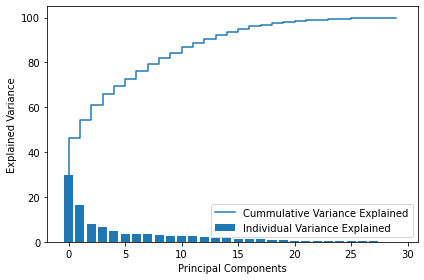

In [22]:
plt.figure(figsize=(6,4))
plt.bar(range(30),var_exp,label='Individual Variance Explained')
plt.step(range(30),cum_var_exp,label='Cummulative Variance Explained')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend()
plt.tight_layout()
plt.show()

In [23]:
#C)

pcaf = PCA(n_components=14)
df_pca = pcaf.fit_transform(df_scaled)

In [24]:
pcnames = []
for i in range(14):
    name = 'PC'+str(i+1)
    pcnames.append(name)
pcnames

['PC1',
 'PC2',
 'PC3',
 'PC4',
 'PC5',
 'PC6',
 'PC7',
 'PC8',
 'PC9',
 'PC10',
 'PC11',
 'PC12',
 'PC13',
 'PC14']

In [25]:
pca_comp = pd.DataFrame(df_pca,columns=pcnames)
pca_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,2.300862,1.233159,0.519077,-0.003002,0.012497,-0.067201,0.013924,0.940337,0.987381,-1.100986,-0.357454,0.713043,-1.049993,-0.407778
1,1.754710,2.005936,-1.789378,-0.771794,-1.172576,1.086449,-1.311008,0.194324,-1.115267,-0.528097,0.588679,-0.483933,-0.746161,-0.401618
2,-0.363341,-1.070214,0.738909,0.866447,-2.234053,-0.230608,-1.187001,0.306626,0.556210,0.170212,-0.177398,-0.704545,0.156777,-0.166730
3,-2.030263,-0.600888,0.859671,0.532216,-0.105242,0.295897,-0.835891,0.827625,0.491654,-0.240299,-0.278973,-0.022767,-0.826198,-0.231039
4,-0.543279,-2.439699,1.262452,0.931419,-1.391382,-0.205432,0.106227,0.118906,0.577084,-1.289772,0.349539,-0.940666,-0.407318,-0.409498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1.778468,-0.874828,0.537456,-0.583008,-0.784265,0.289970,1.267873,-0.965290,-0.539160,0.127319,-0.106719,0.232105,0.184598,-0.026897
3043,1.779738,2.421678,-2.271383,3.253364,0.146391,0.826239,0.664240,0.287703,-0.277434,0.618045,1.393891,2.092077,0.223301,0.163274
3044,1.885219,1.312873,-1.978683,2.321653,1.525109,2.070938,1.229653,2.274901,1.411002,0.538730,0.491534,0.220149,-0.478655,-0.881489
3045,2.212022,-0.859875,-0.433570,0.760881,1.285442,0.024588,0.293835,-0.257563,-0.335318,-0.575438,-0.063754,-0.207211,-0.262908,-0.570189


In [26]:
pca_comp.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
PC1,1.000000e+00,7.247038e-17,8.772963e-17,1.661523e-17,-5.975749e-17,2.681891e-17,5.226868e-17,2.914493e-17,-1.197964e-17,-3.480162e-17,-6.018117e-17,7.397911e-17,-7.226568e-17,-3.345778e-17
PC2,7.247038e-17,1.000000e+00,3.757453e-16,-7.025106e-17,4.386791e-17,5.793693e-17,3.833017e-17,5.320508e-18,-8.066859e-17,4.912128e-18,3.204484e-17,-2.685492e-17,1.558980e-17,4.309632e-19
PC3,8.772963e-17,3.757453e-16,1.000000e+00,-5.766384e-17,7.244977e-17,-5.889755e-17,-1.503815e-18,4.474645e-17,4.062437e-17,2.283572e-18,5.338597e-17,3.367502e-18,-8.453294e-19,-3.616466e-17
PC4,1.661523e-17,-7.025106e-17,-5.766384e-17,1.000000e+00,-2.333010e-16,-1.790272e-16,-1.230791e-16,4.545154e-16,-1.484039e-16,7.980231e-17,-8.234536e-17,1.428879e-16,8.112214e-17,-1.141001e-17
PC5,-5.975749e-17,4.386791e-17,7.244977e-17,-2.333010e-16,1.000000e+00,2.467356e-16,1.128004e-16,-2.078145e-18,-1.732772e-16,-3.398725e-17,2.669577e-17,-1.658909e-16,8.657649e-17,1.627034e-17
PC6,2.681891e-17,5.793693e-17,-5.889755e-17,-1.790272e-16,2.467356e-16,1.000000e+00,-1.299249e-16,3.061238e-16,1.221276e-16,5.630551e-17,2.136499e-16,2.155490e-16,4.637912e-17,9.954574e-17
PC7,5.226868e-17,3.833017e-17,-1.503815e-18,-1.230791e-16,1.128004e-16,-1.299249e-16,1.000000e+00,2.516215e-16,3.782823e-16,9.459872e-17,-9.359039e-17,9.997999e-17,-2.210079e-16,2.774182e-16
PC8,2.914493e-17,5.320508e-18,4.474645e-17,4.545154e-16,-2.078145e-18,3.061238e-16,2.516215e-16,1.000000e+00,3.823553e-16,-2.114984e-16,2.061023e-16,-2.971842e-16,4.299271e-17,-2.689107e-17
PC9,-1.197964e-17,-8.066859e-17,4.062437e-17,-1.484039e-16,-1.732772e-16,1.221276e-16,3.782823e-16,3.823553e-16,1.000000e+00,3.447976e-17,5.049651e-16,3.285813e-16,2.297393e-16,-3.945932e-16
PC10,-3.480162e-17,4.912128e-18,2.283572e-18,7.980231e-17,-3.398725e-17,5.630551e-17,9.459872e-17,-2.114984e-16,3.447976e-17,1.000000e+00,1.908079e-16,3.339493e-16,-2.978486e-16,5.002183e-16


<AxesSubplot:>

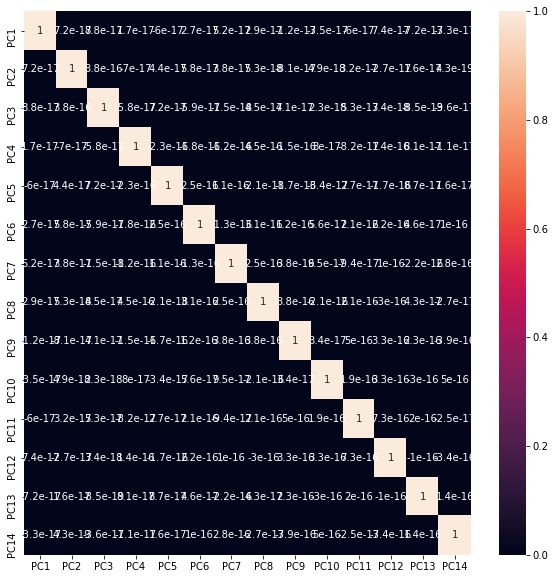

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(pca_comp.corr(),annot=True)
#No multicollinearity

array([[<AxesSubplot:title={'center':'PC1'}>,
        <AxesSubplot:title={'center':'PC2'}>,
        <AxesSubplot:title={'center':'PC3'}>,
        <AxesSubplot:title={'center':'PC4'}>],
       [<AxesSubplot:title={'center':'PC5'}>,
        <AxesSubplot:title={'center':'PC6'}>,
        <AxesSubplot:title={'center':'PC7'}>,
        <AxesSubplot:title={'center':'PC8'}>],
       [<AxesSubplot:title={'center':'PC9'}>,
        <AxesSubplot:title={'center':'PC10'}>,
        <AxesSubplot:title={'center':'PC11'}>,
        <AxesSubplot:title={'center':'PC12'}>],
       [<AxesSubplot:title={'center':'PC13'}>,
        <AxesSubplot:title={'center':'PC14'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

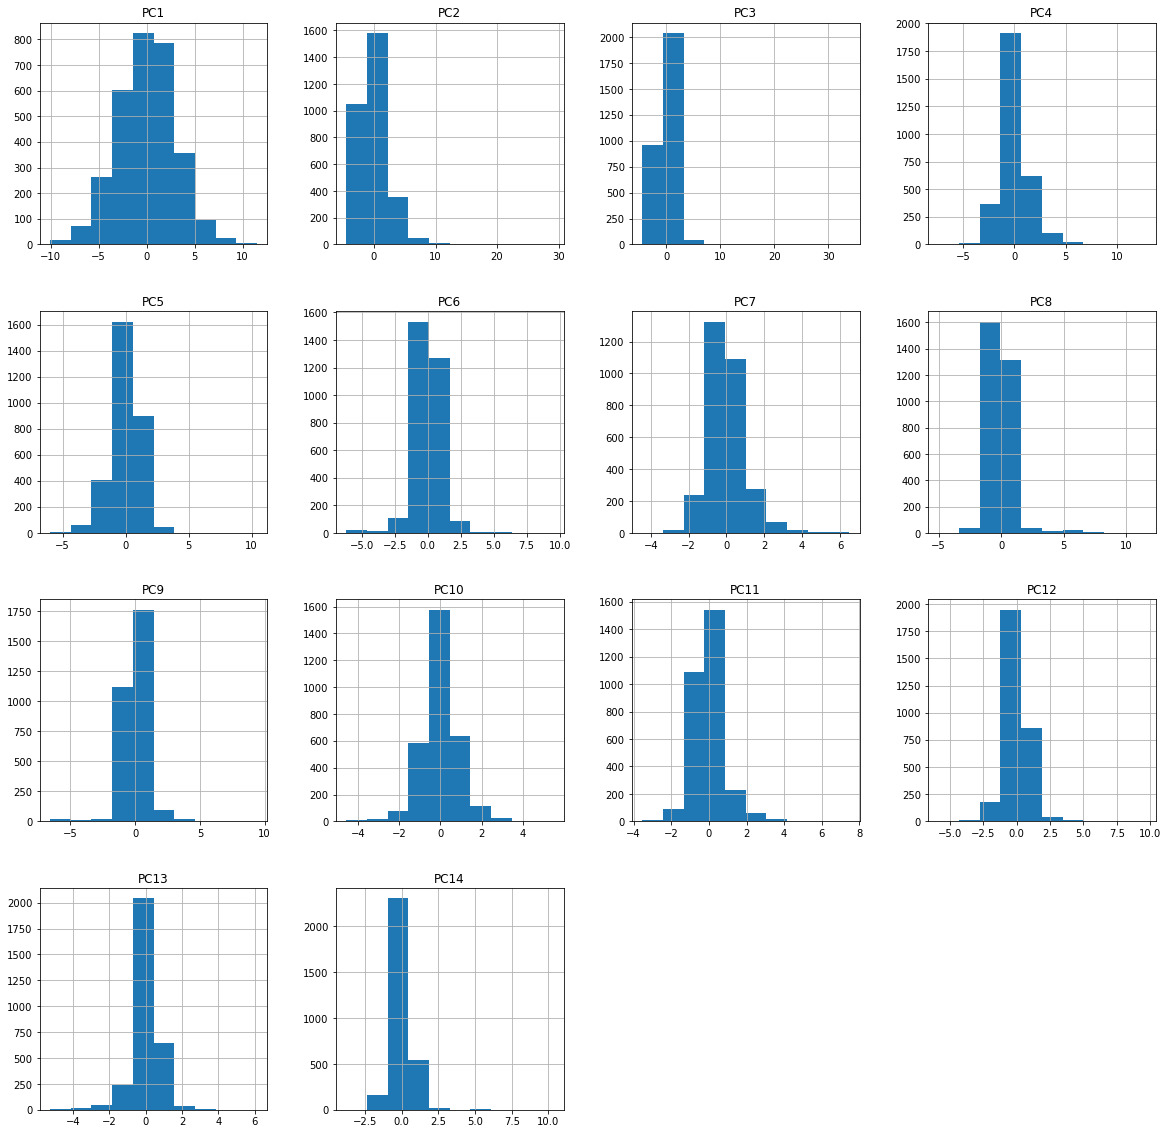

In [28]:
#D)
pca_comp.hist(figsize=(20,20))

<AxesSubplot:>

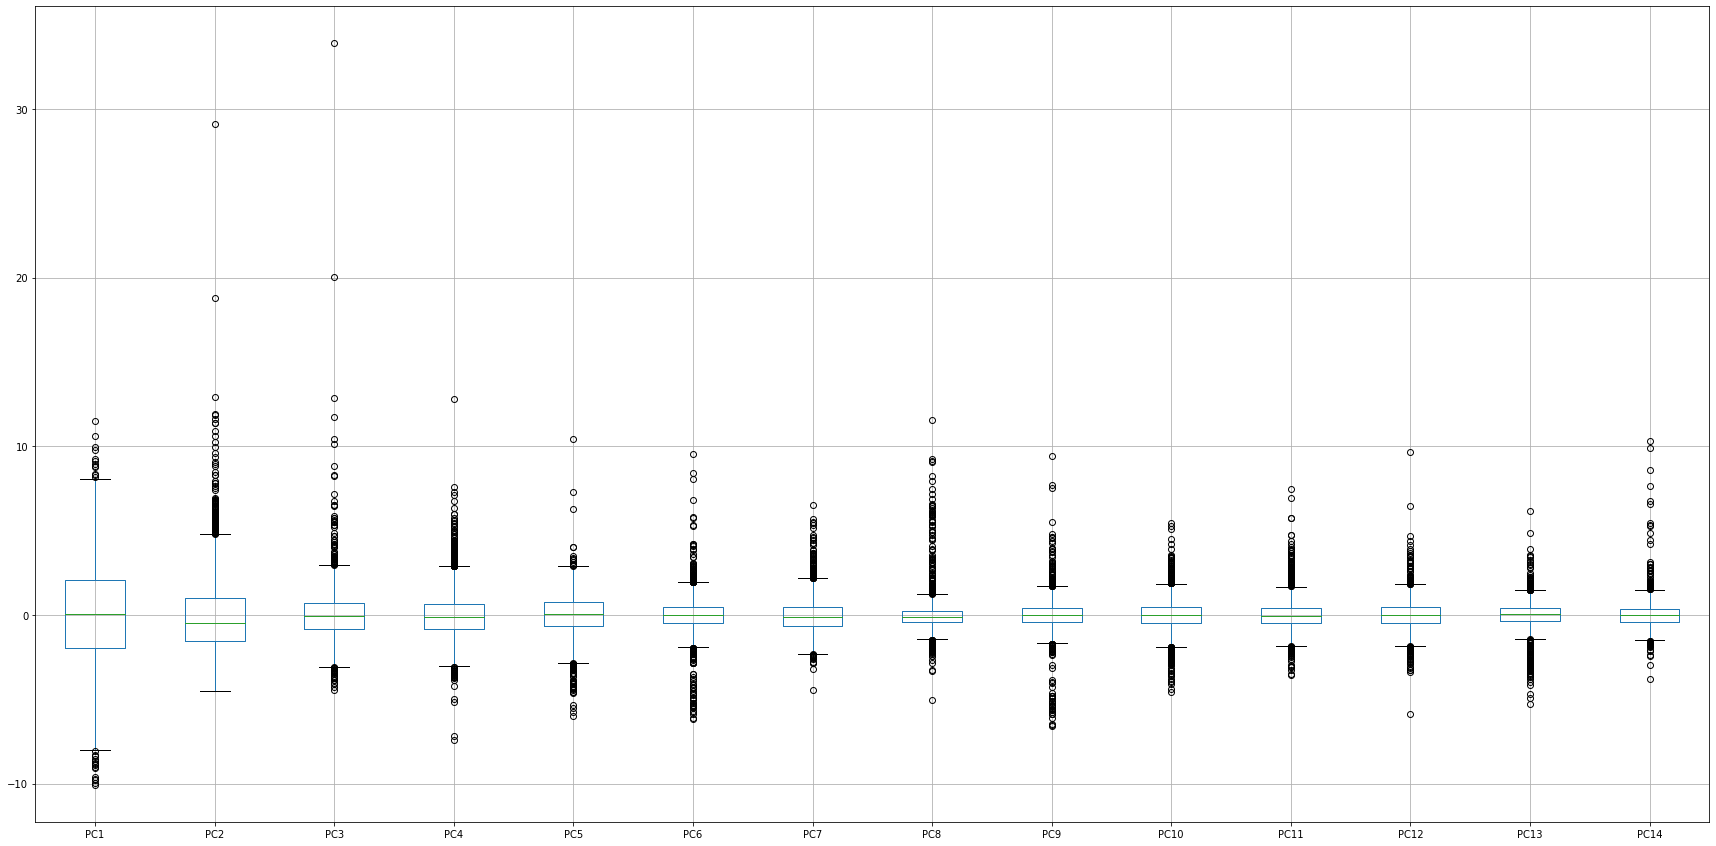

In [29]:
#E)

plt.figure(figsize=(30,15))
pca_comp.boxplot()

In [30]:
Q1 = pca_comp.quantile(0.25)
Q3 = pca_comp.quantile(0.75)

IQR = Q3-Q1

UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

pca_comp = pca_comp[~((pca_comp<LL) | (pca_comp>UL)).any(axis = 1)]
pca_comp.shape

(2283, 14)

### 4.	Clustering: Use PCA dimensions to cluster the data. Apply K-means and Agglomerative clustering. (30 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Apply Clustering and visualize the spread of data (15 marks)

b.  Find the optimal number of cluster Value. (8 marks)

c.	Evaluate the clusters formed using appropriate metrics (inertia, silhouette score) to support the model built and compare both the models. (5 marks)

d.	Using best attributes based on the relationship between them, plot the clusters. (2 marks)


In [31]:
#A) and #B)

#K-Means:

from sklearn.cluster import KMeans
cluster_range=range(1,20)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters, n_init=10,random_state=0)
    clusters.fit(pca_comp)
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
clusters_df

,num_clusters,cluster_errors
0,1,36588.150317
1,2,25506.545346
2,3,22010.666211
3,4,19515.730619
4,5,17923.604118
5,6,16897.346672
6,7,16160.478576
7,8,15531.102830
8,9,15001.404589
9,10,14542.873671


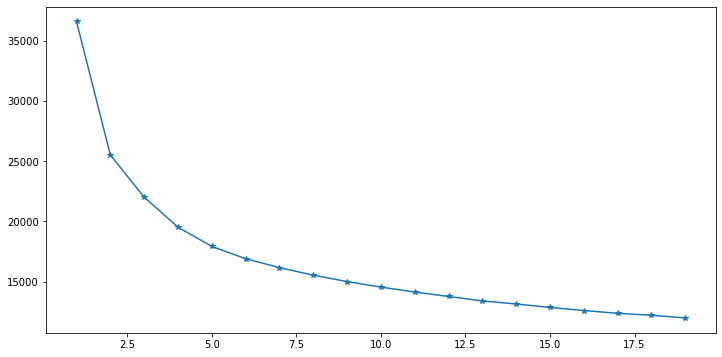

In [32]:
plt.figure(figsize=(12,6))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker='*')

In [33]:
#### a. Find the optimal K Value. (6 marks)

In [34]:
link_mat = linkage(pca_comp, method = 'ward')
print(link_mat[0:10])

[[1268.         1290.            0.64111131    2.        ]
 [ 490.          493.            0.65747171    2.        ]
 [1865.         1886.            0.68906613    2.        ]
 [ 945.         2118.            0.71546253    2.        ]
 [1228.         1508.            0.72845097    2.        ]
 [ 364.         1072.            0.73257793    2.        ]
 [1843.         1863.            0.73349764    2.        ]
 [  35.         1476.            0.73488904    2.        ]
 [1198.         1209.            0.73943563    2.        ]
 [ 952.         1214.            0.74792928    2.        ]]


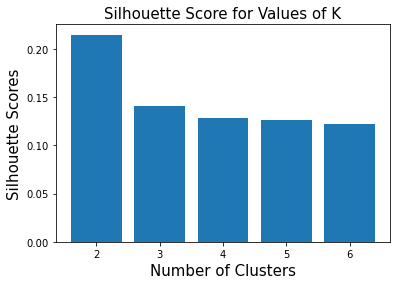

In [35]:
K = [2,3,4,5,6]

silhouette_scores = [] 

for i in K:
    model = AgglomerativeClustering(n_clusters = i) 

    silhouette_scores.append(silhouette_score(pca_comp, model.fit_predict(pca_comp))) 
    
plt.bar(K, silhouette_scores) 


plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)


plt.show()

In [36]:
###kmeans

In [37]:
kmeans = KMeans(n_clusters=3, n_init=15, random_state=0)
kmeans.fit(pca_comp)
centroids = kmeans.cluster_centers_
centroids_df = pd.DataFrame(centroids, columns=list(pca_comp.columns))

centroids_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,0.669107,-1.354116,0.216104,-0.028724,0.288326,-0.000817,-0.077988,-0.166408,-0.042594,0.022324,0.006900,-0.039834,0.136458,0.044314
1,-2.819924,0.111950,0.004328,-0.011236,0.043722,-0.053979,-0.154025,-0.068245,0.053925,-0.101749,-0.172861,-0.008920,-0.011800,-0.006491
2,3.270726,0.907944,-0.625067,-0.296430,0.039319,-0.020216,-0.187739,-0.021223,-0.013496,-0.018557,-0.163344,-0.029849,-0.030149,-0.225450


In [38]:
kmeans.labels_

array([2, 2, 0, ..., 0, 0, 2])

In [39]:
pca_compcopy=pca_comp.copy()
pca_compcopy['Class']=list(kmeans.labels_)
pca_compcopy.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Class
0,2.300862,1.233159,0.519077,-0.003002,0.012497,-0.067201,0.013924,0.940337,0.987381,-1.100986,-0.357454,0.713043,-1.049993,-0.407778,2
1,1.754710,2.005936,-1.789378,-0.771794,-1.172576,1.086449,-1.311008,0.194324,-1.115267,-0.528097,0.588679,-0.483933,-0.746161,-0.401618,2
2,-0.363341,-1.070214,0.738909,0.866447,-2.234053,-0.230608,-1.187001,0.306626,0.556210,0.170212,-0.177398,-0.704545,0.156777,-0.166730,0
3,-2.030263,-0.600888,0.859671,0.532216,-0.105242,0.295897,-0.835891,0.827625,0.491654,-0.240299,-0.278973,-0.022767,-0.826198,-0.231039,1
4,-0.543279,-2.439699,1.262452,0.931419,-1.391382,-0.205432,0.106227,0.118906,0.577084,-1.289772,0.349539,-0.940666,-0.407318,-0.409498,0


In [40]:
pca_compcopy['Class'].value_counts()

0    980
1    789
2    514
Name: Class, dtype: int64

### Agglomerative Clustering

In [41]:
from sklearn.cluster import AgglomerativeClustering
hie_clus = AgglomerativeClustering(n_clusters=3,affinity ='euclidean',linkage='ward')
cluster2 = hie_clus.fit_predict(pca_comp)

pca_df_agg = pca_comp.copy(deep=True)
pca_df_agg['label'] = cluster2
pca_df_agg

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,label
0,2.300862,1.233159,0.519077,-0.003002,0.012497,-0.067201,0.013924,0.940337,0.987381,-1.100986,-0.357454,0.713043,-1.049993,-0.407778,0
1,1.754710,2.005936,-1.789378,-0.771794,-1.172576,1.086449,-1.311008,0.194324,-1.115267,-0.528097,0.588679,-0.483933,-0.746161,-0.401618,0
2,-0.363341,-1.070214,0.738909,0.866447,-2.234053,-0.230608,-1.187001,0.306626,0.556210,0.170212,-0.177398,-0.704545,0.156777,-0.166730,0
3,-2.030263,-0.600888,0.859671,0.532216,-0.105242,0.295897,-0.835891,0.827625,0.491654,-0.240299,-0.278973,-0.022767,-0.826198,-0.231039,1
4,-0.543279,-2.439699,1.262452,0.931419,-1.391382,-0.205432,0.106227,0.118906,0.577084,-1.289772,0.349539,-0.940666,-0.407318,-0.409498,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3040,-0.872081,-2.657555,2.709295,-0.795260,0.242835,-0.523405,-1.079500,0.483135,0.725780,-1.312854,1.500546,-0.247458,-0.021150,-1.066818,1
3041,4.376964,1.998838,-1.797358,-1.959003,-0.022249,1.952484,-0.420950,0.338113,-1.097044,0.438189,0.609207,-0.872372,-0.003278,-0.373189,0
3042,1.778468,-0.874828,0.537456,-0.583008,-0.784265,0.289970,1.267873,-0.965290,-0.539160,0.127319,-0.106719,0.232105,0.184598,-0.026897,0
3045,2.212022,-0.859875,-0.433570,0.760881,1.285442,0.024588,0.293835,-0.257563,-0.335318,-0.575438,-0.063754,-0.207211,-0.262908,-0.570189,1


In [42]:
pca_df_agg['label'].value_counts()

0    1017
1     928
2     338
Name: label, dtype: int64

In [43]:
#C)

from sklearn.metrics import silhouette_score

silhoutte_k = silhouette_score(pca_comp, pca_compcopy['Class'])
silhoutte_h = silhouette_score(pca_comp, pca_df_agg['label'])
print("Silhoutte Score for K-Means Clustering: ",silhoutte_k)
print("Silhoutte Score for Agglomerative Clustering: ",silhoutte_h)

Silhoutte Score for K-Means Clustering:  0.1865099910124763
Silhoutte Score for Agglomerative Clustering:  0.14108065332894004


In [44]:
#K-Means Inertia
print("Inertia of K-Means Clustering: ",kmeans.inertia_)

Inertia of K-Means Clustering:  22010.666210743337


In [45]:
agc_clusters = pca_df_agg.copy()
agc_clusters_group = agc_clusters.groupby(['label'])
df0 = agc_clusters_group.get_group(0)
df1 = agc_clusters_group.get_group(1)
df2 = agc_clusters_group.get_group(2)

In [46]:
c0 = np.array(df0.mean())
c1 = np.array(df1.mean())
c2 = np.array(df2.mean())

c0 = c0[:-1]
c1 = c1[:-1]
c2 = c2[:-1]

agc_I0 = 0
agc_I1 = 0
agc_I2 = 0


for i in np.arange(df0.shape[0]):
    agc_I0 = agc_I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    agc_I1 = agc_I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    agc_I2 = agc_I2+np.sum((df2.iloc[i,:-1]-c2)**2)
    
print("Inertia of AGC:",agc_I0+agc_I1+agc_I2)

Inertia of AGC: 24506.004357386235


Inference: The Inertia of Agglomerative Clustering is higher than the K-Means Clustering.

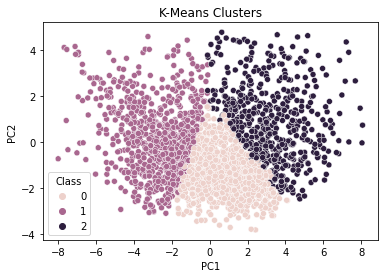

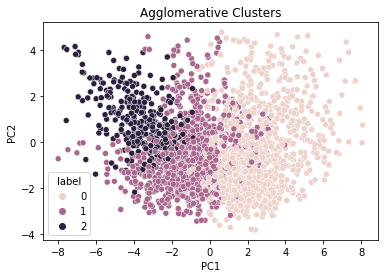

In [47]:
#D)


plt.title("K-Means Clusters")
sns.scatterplot(x='PC1',y='PC2',hue='Class',data=pca_compcopy)
plt.show()


plt.title("Agglomerative Clusters")
sns.scatterplot(x='PC1',y='PC2',hue='label',data=pca_df_agg)
plt.show()

Inference: From the above plots, the overlap between the labels is more in K-Means Clustering as compared to that of Agglomerative Clustering. The separation between the labels is better in Agglomerative Clustering.

### 5.	Use the cluster labels from the best method above and interpret the clusters formed. (5 marks)

In [48]:
pca_compcopy['Class'].value_counts()

0    980
1    789
2    514
Name: Class, dtype: int64

In [49]:
print("Silhoutte Score for K-Means Clustering: ",silhoutte_k)
print("Inertia of K-Means Clustering: ",kmeans.inertia_)

Silhoutte Score for K-Means Clustering:  0.1865099910124763
Inertia of K-Means Clustering:  22010.666210743337


In [50]:
pca_df_agg['label'].value_counts()

0    1017
1     928
2     338
Name: label, dtype: int64

In [51]:
print("Silhoutte Score for Agglomerative Clustering: ",silhoutte_h)
print("Inertia of AGC:",agc_I0+agc_I1+agc_I2)

Silhoutte Score for Agglomerative Clustering:  0.14108065332894004
Inertia of AGC: 24506.004357386235


Inference: Comparing the Silhouette score of both K-Means Clustering and the Agglomerative Clustering, Agglomerative Clustering seems a better Model.

In [52]:
df_final = df.copy()
df_final['Labels']=cluster2
df_final['Labels'].value_counts()

ValueError: Length of values (2283) does not match length of index (3047)

### 6.	Summarize as follows (10 marks)

a.	Summarize the overall fit of the model. Compare all the clustering models built and list down the measures to prove that it is a good model.

b.	Write down a business interpretation/explanation of the model. (List the countries to be focused on).

c.	What are the key risks to your results and interpretation?


#A)

We have performed PCA with 10 components which explains 90% variance of the whole data and clustered it on both K-Means Clustering and Agglomerative Clustering.

Also, there is a significant trend of pattern in data which can be grouped. From the K-Means Clustering we found 3 clusters and Agglomerative Clustering we found 3 clusters.

Comparing the Silhouette score of both K-Means Clustering and the Agglomerative Clustering, Agglomerative Clustering seems a better Model.

#C)

1. Mitigating Risk of Machine Learning
2. Data Difficulties
3. Technology Troubles
4. Security Snags
5. Interaction Issues